# Objective
#### Performing Exploratory Data Analysis
- Exploratory Data Analysis
- General information on the dataset
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Conclusion

In [1]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bank = pd.read_csv("https://raw.githubusercontent.com/alien087/pembelajaran-python-AI/main/bank_churn.csv")

## Informasi Dataset

Apa itu bank churn?

Untuk produk hipotek, churn didefinisikan sebagai nasabah yang membiayai kembali produk hipotek yang ada melalui bank lain atau melakukan pembayaran di muka secara penuh sebelum masa sewa selesai. Exited disini yaitu meninggalkan layanan

In [3]:
bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
bank["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
bank.shape
##Terdapat 10.000 baris dan 14 kolom

(10000, 14)

In [6]:
bank.info()
#tidak terdapat nilai null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank.isnull().sum()
#tidak terdapat nilai null

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Deskripsi

In [8]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univariate Analysis

In [9]:
bank["Exited"].unique()

array([1, 0])

In [10]:
keluar = bank.loc[bank['Exited'] == 1]
bertahan = bank.loc[bank['Exited'] == 0]

In [11]:
keluar.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
35,36,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
41,42,15738148,Clarke,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
43,44,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1


In [41]:
bertahan.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0


In [12]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**RowNumber, CustomerId, Surname, CreditScore, Geography,Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary**

In [13]:
bank_copy = bank
bank_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


###Menggunakan 4 kolom 

**CreditScore, Age, Balance, EstimatedSalary**

In [14]:
bank_copy.drop(labels=['RowNumber', 'CustomerId','Surname','Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember'], axis=1)

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


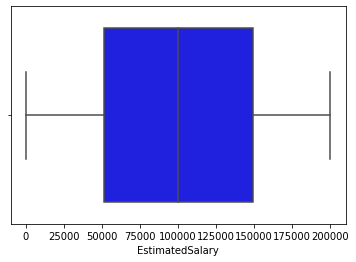

In [34]:
sns.boxplot(x = bank_copy['EstimatedSalary'], color='blue')

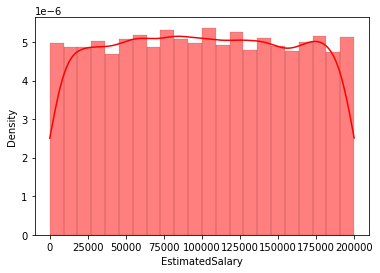

In [36]:
sns.histplot(data=bank_copy['EstimatedSalary'],  color="red", kde=True, stat="density", linewidth=0.1)  

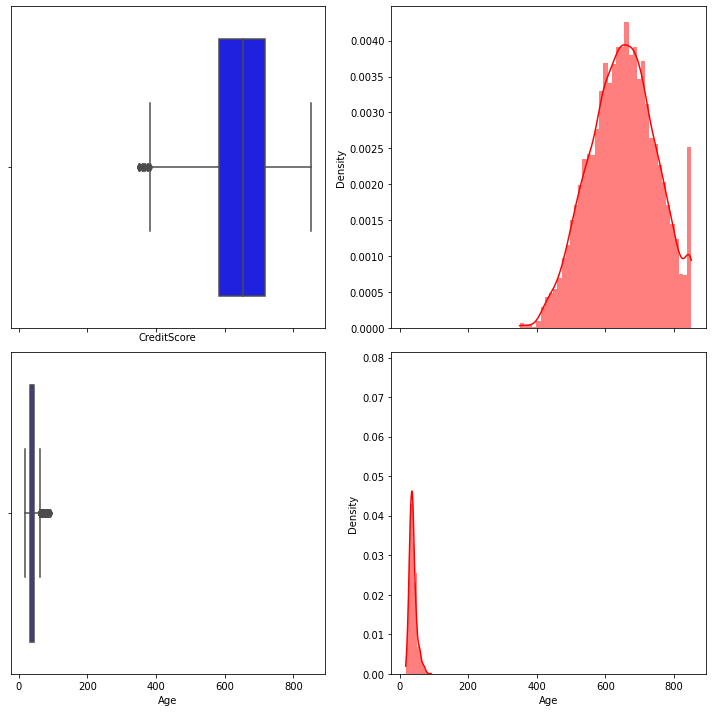

In [17]:
f,axes=plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)

column=['CreditScore', 'Age']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = bank_copy[column[i]], ax=axes[i][0], color='blue')
    
    # Ploting the KDE
    sns.histplot(data=bank_copy[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

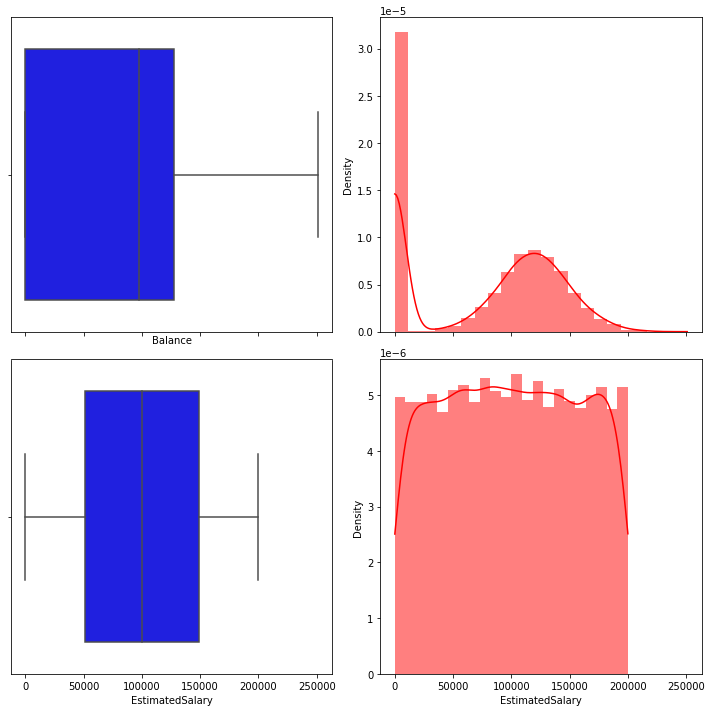

In [18]:
f,axes=plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)

column=['Balance', 'EstimatedSalary']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = bank_copy[column[i]], ax=axes[i][0], color='blue')
    
    # Ploting the KDE
    sns.histplot(data=bank_copy[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

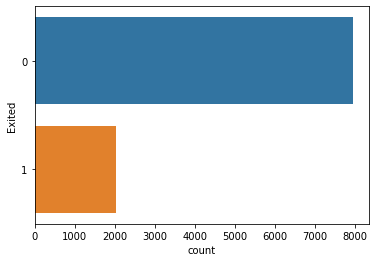

In [44]:
sns.countplot(y=bank_copy['Exited'])

## Bivariate Data Analysis

- CreditScore vs Exited
- Age vs Exited
- Balance vs Exited
- EstimatedSalary vs Exited


In [20]:
bank_copy['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

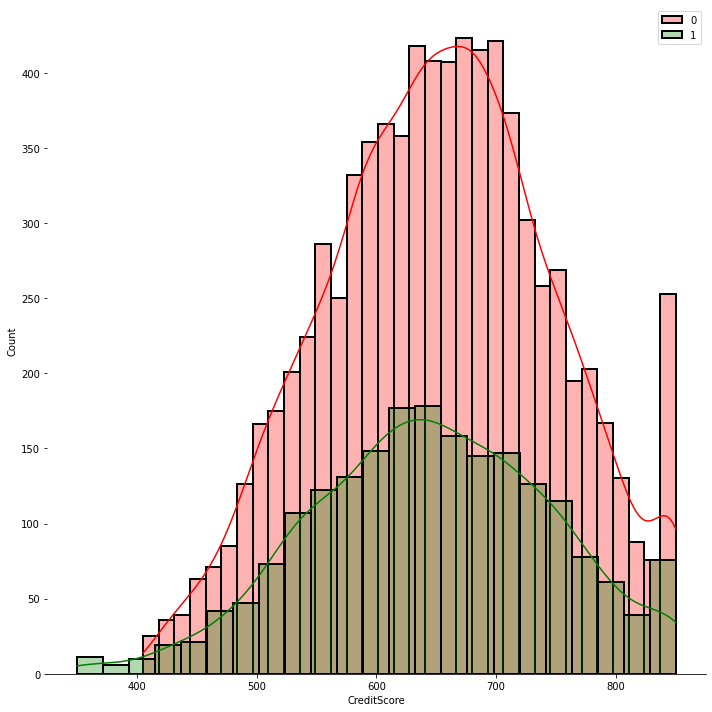

In [21]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(10, 10), sharex=True)
sns.despine(left=True)  #CreditScore vs Exited

# Ploting the histogram with KDE
sns.histplot(data=bertahan["CreditScore"],label=0,color='red',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=keluar["CreditScore"],label=1,color='green',kde=True,linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

**Dapat dilihat bahwa data di atas terjadi overlaping dan masih agak sulit melihat exited, keluar dan bertahan dalam Credit Score**

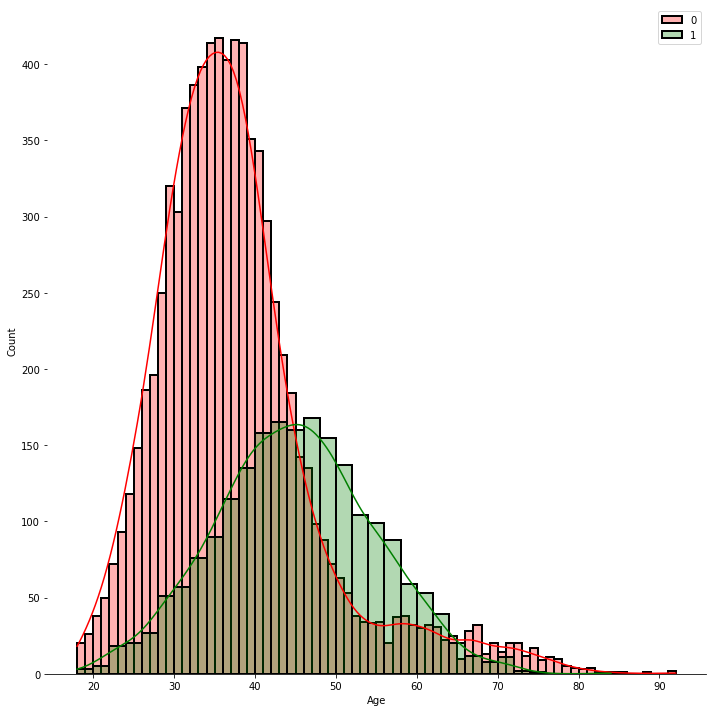

In [22]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.histplot(data=bertahan["Age"],label=0,color='red',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=keluar["Age"],label=1,color='green',kde=True,linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

Dalam histogram di atas masih terdapat overlaping pada beberapa data di 18-45 jadi masih sedikit data yang tidak overlaping

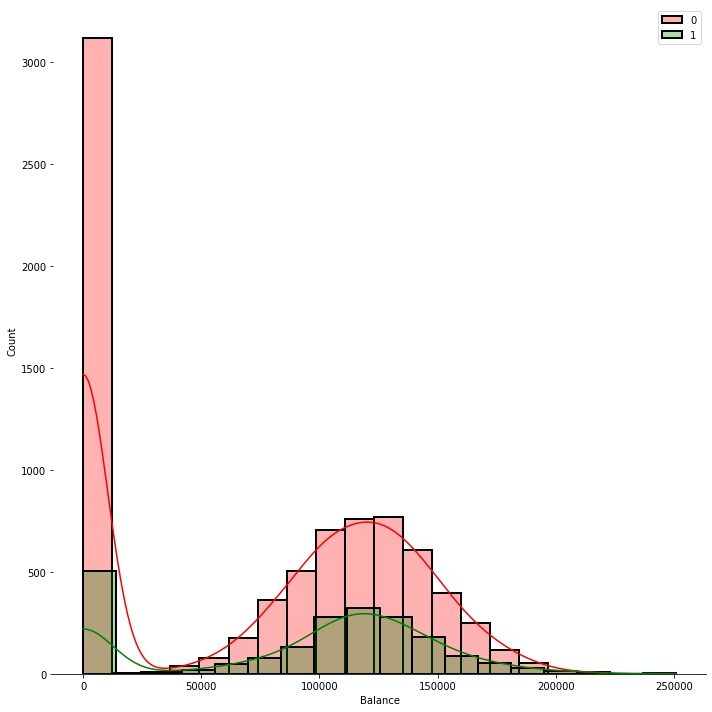

In [23]:
f, axes = plt.subplots(ncols = 1,figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.histplot(data=bertahan["Balance"],label=0,color='red',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=keluar["Balance"],label=1,color='green',kde=True,linewidth=2,alpha=0.3)


plt.legend()
plt.tight_layout()

terjadinya overalpping pada histogram di atas

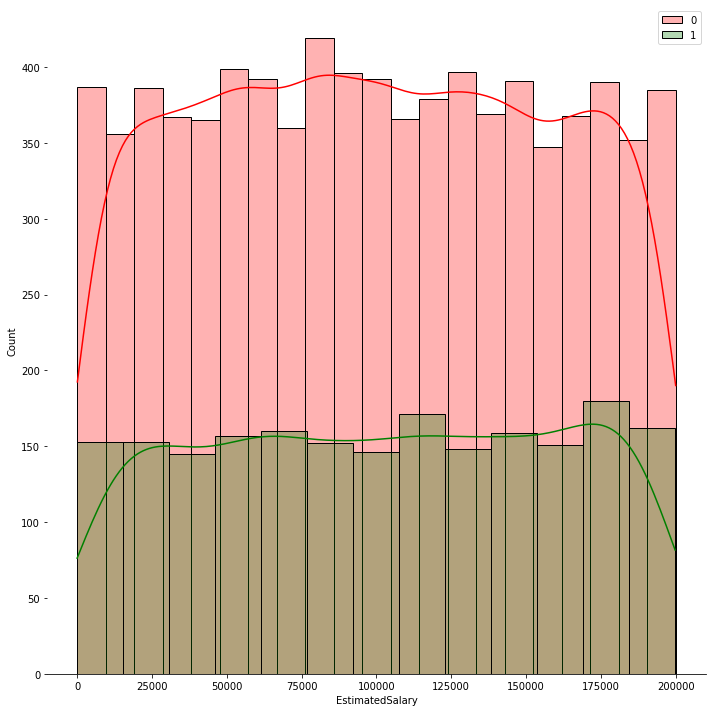

In [43]:
f, axes = plt.subplots(ncols = 1,figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.histplot(data=bertahan["EstimatedSalary"],label=0,color='red',kde=True,linewidth=1,alpha=0.3)
sns.histplot(data=keluar["EstimatedSalary"],label=1,color='green',kde=True,linewidth=1,alpha=0.3)


plt.legend()
plt.tight_layout()

terjadinya overlapping pada data tersebut masih belum bisa menentukan yang keluar dan bertahan dari estimated salary

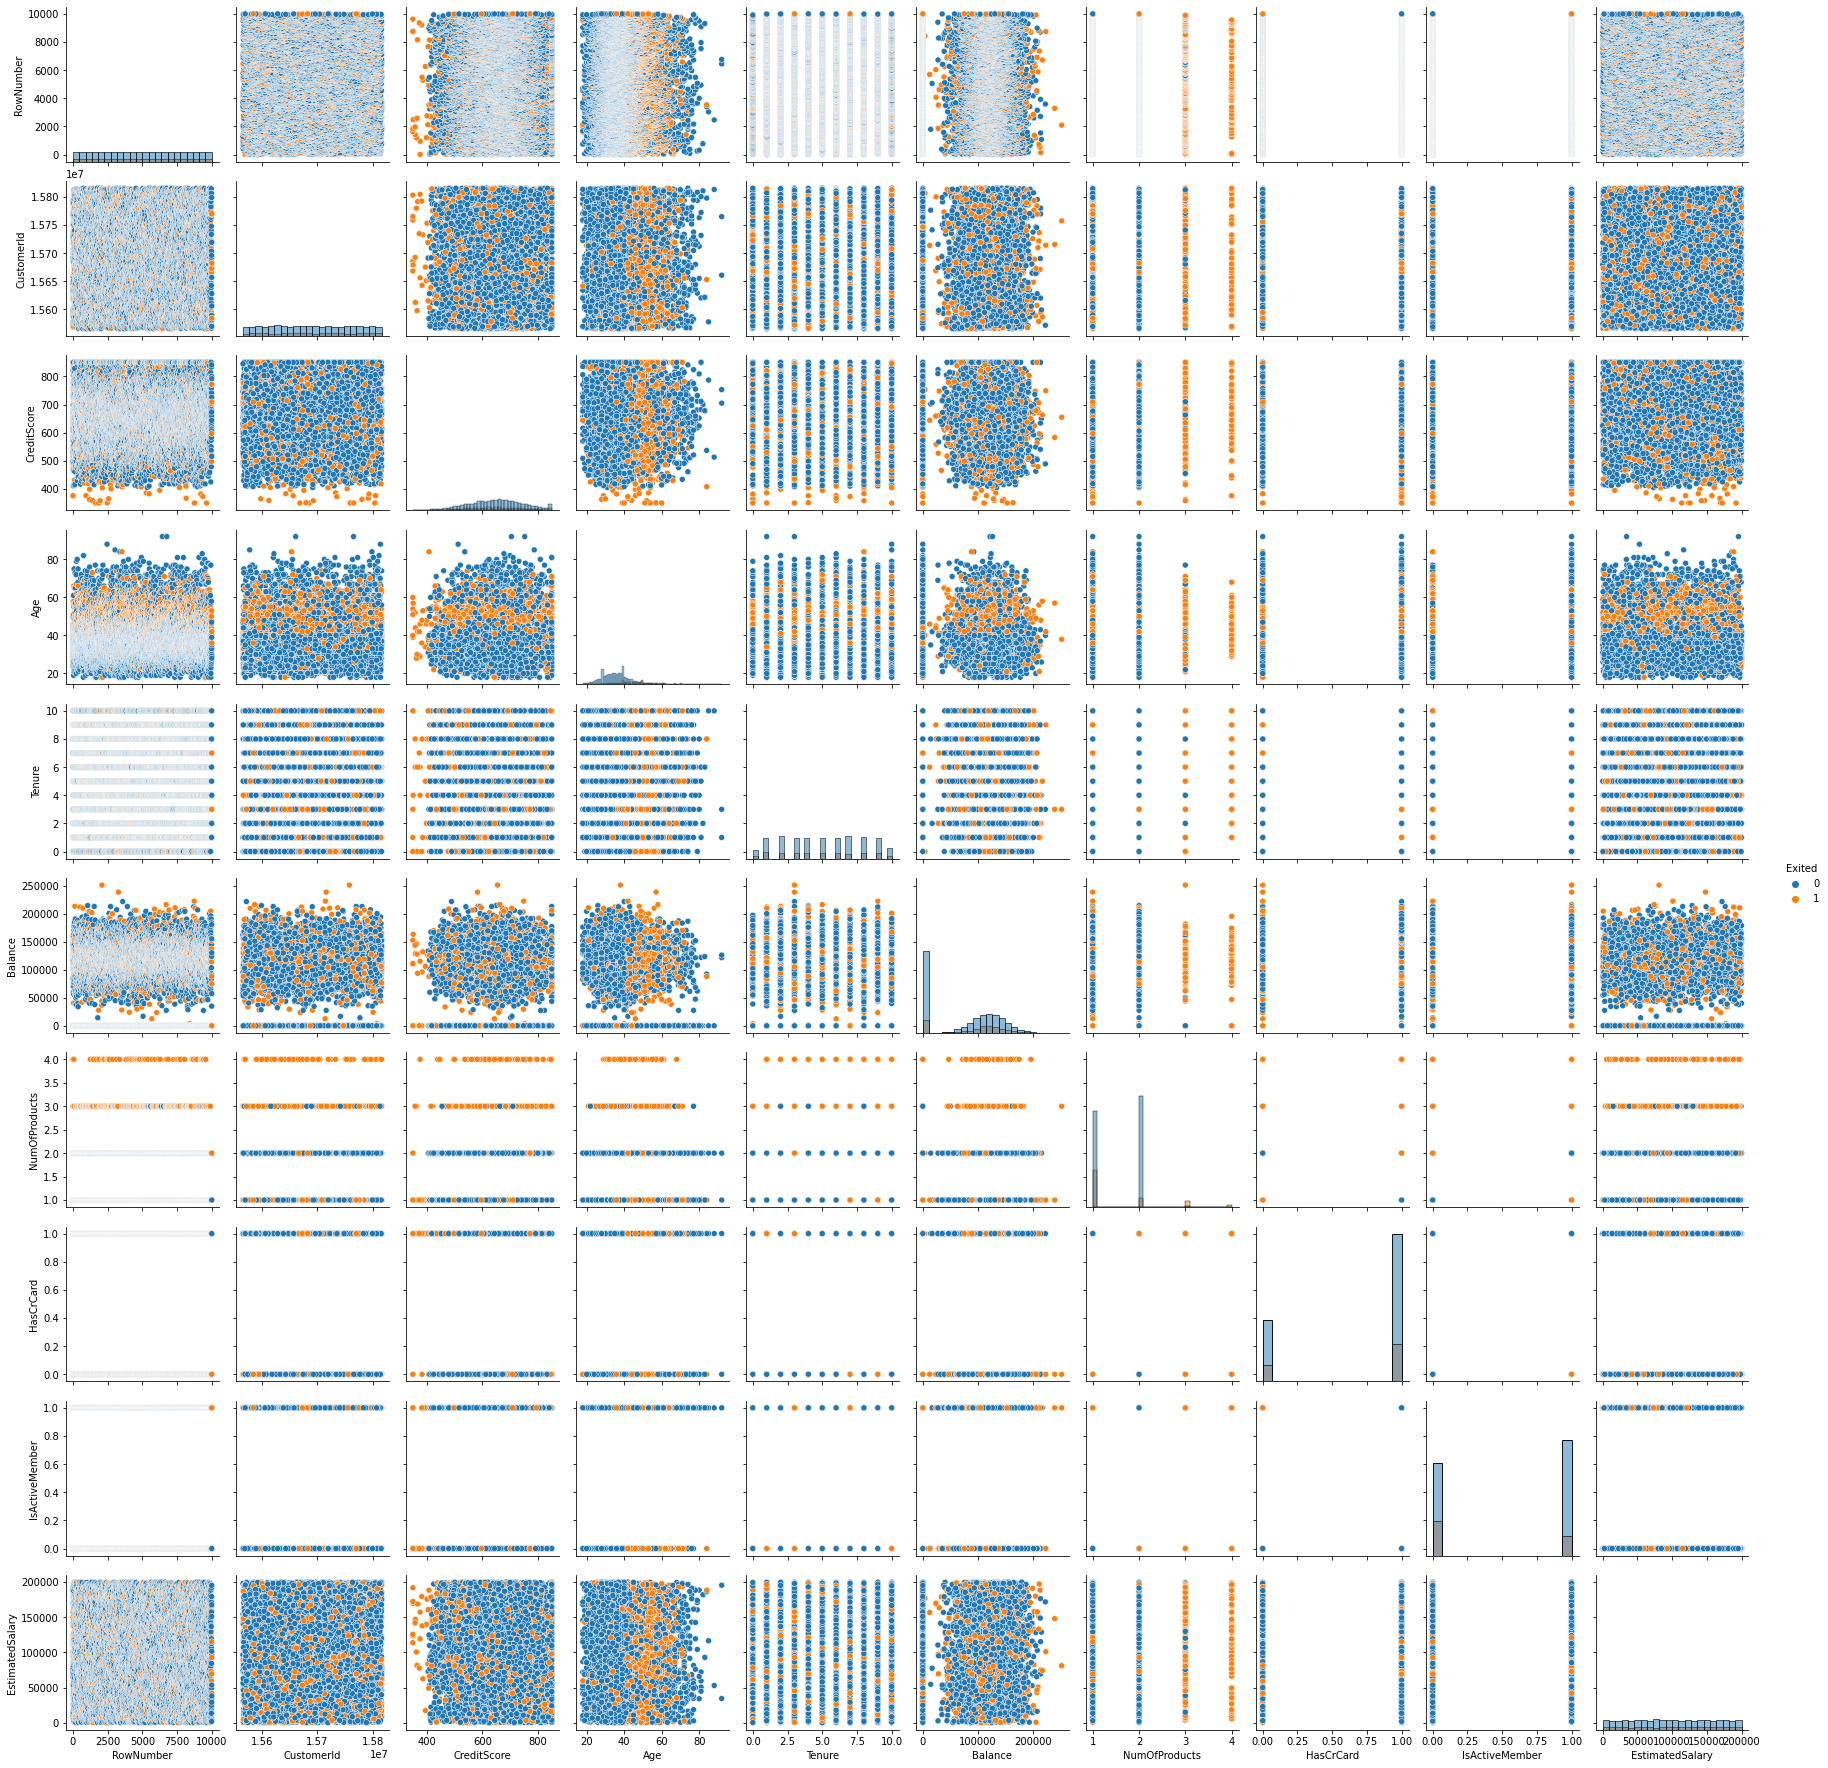

In [46]:
sns.pairplot(bank_copy, hue="Exited", diag_kind="hist")
plt.show()

##Conclusion
**CreditScore, Age, Balance, EstimatedSalary**


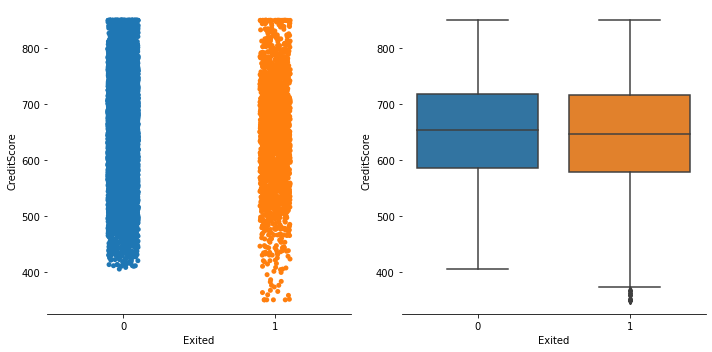

In [56]:
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

sns.stripplot(x=bank_copy['Exited'], y=bank_copy['CreditScore'], ax=axes[0])

sns.boxplot(x=bank_copy['Exited'], y=bank_copy['CreditScore'], ax=axes[1])

plt.tight_layout()

**Conclusion**

Berdasarkan CreditScore yang dilihat dengan Exited 0 dan 1 dapat disimpulakan bahwa, 
- Terlihat dari CreditScore yang bentuknya meluber yaitu yang exited 1 sedangkan exited 0 terlihat konstan
- Pada Exited 0 terlihat sedikit lebih kecil dan teratur sedangkan 1 terlihat melewati namun pada area yang sama
- Berarti terdapat CreditScore dengan pola yang berbeda pada Exited 1 yang membedakan dengan Exited 0 terlihat pada outlier

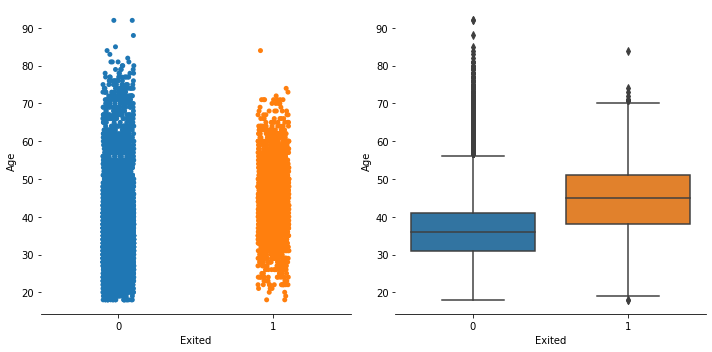

In [57]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.stripplot(x=bank_copy['Exited'], y=bank_copy['Age'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=bank_copy['Exited'], y=bank_copy['Age'], ax=axes[1])

plt.tight_layout()

**Conclusion**

Berdasarkan dari Age yang dilihat dengan Exited 0 dan 1 dapat disimpulakan bahwa,

- Terlihat dengan Exited 0 yang semakin ke atas lebih meluber lalu pada Exited 1 terlihat pola yang meluber dibawah dan di atas
- Pada pola Age boxplot yang Exited 0 terlihat lebih tipis dari exited 1
- Berarti terdapat Age dengan pola yang berbeda pada Exited 0 yang membedakan dengan Exited 1 terlihat pada outliers

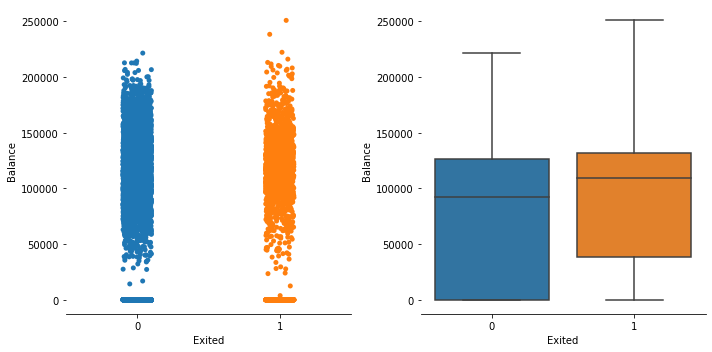

In [58]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.stripplot(x=bank_copy['Exited'], y=bank_copy['Balance'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=bank_copy['Exited'], y=bank_copy['Balance'], ax=axes[1])

plt.tight_layout()

**Conclusion**

Berdasarkan dari Age yang dilihat dengan Exited 0 dan 1 dapat disimpulakan bahwa,

- Terlihat dengan Exited 0 dan Exited 1 yang memiliki pola pada bagian bawah yang sama, juga memiliki pola yang hampir mirip 
- Pada pola Balance yang lebih besar pada Exited 0 yang lebih condong ke bawah
- Berarti terdapat Balance dengan pola yang sama pada Exited 0 dengan Exited 1 yang tidak terlihat memiliki outliers

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


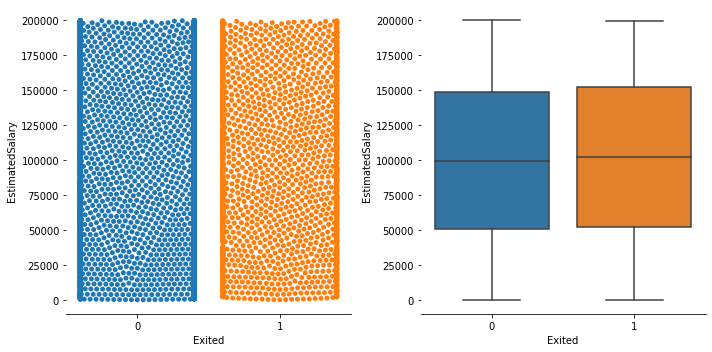

In [61]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=bank_copy['Exited'], y=bank_copy['EstimatedSalary'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=bank_copy['Exited'], y=bank_copy['EstimatedSalary'], ax=axes[1])

plt.tight_layout()

**Conclusion**

Berdasarkan dari Age yang dilihat dengan Exited 0 dan 1 dapat disimpulakan bahwa,

- Terlihat EstimatedSalary dengan Exited 0 dan Exited 1 yang memiliki pola hampir mirip 
- Pada pola EstimatedSalary yang lebih sedikit besar pada Exited 1 dengan pola hampir mirip
- Berarti EstimatedSalary memiliki pola yang sama pada Exited 0 dengan Exited 1 yang tidak terlihat memiliki outliers